In [1]:
#importing necessary libraries
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets of IPL
df_matches = pd.read_csv("Indian Premier League\matches.csv")
df_deliveries = pd.read_csv("Indian Premier League\deliveries.csv")

In [3]:
#getting first 5 rows from matches dataset
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#getting how many rows and columns in the matches dataset
df_matches.shape

(756, 18)

In [5]:
#getting brief information about the dataset
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
#getting first 5 rows from deliveries dataset
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Data Preparation and Cleaning
- df_matches

In [8]:
#droping unnecessary columns
df_matches.drop(columns=["id","dl_applied","umpire1","umpire2","umpire3"],inplace=True)

In [9]:
#converting date column into datetime series
df_matches.date = pd.to_datetime(df_matches.date)

In [10]:
#checking if there is any missing values in the matches datset
df_matches.isna().sum()

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [11]:
#Filling missing values in the city column by most frequent city 
df_matches.city.fillna(df_matches.city.value_counts()[0],inplace=True)

In [12]:
#dropping missing values of remaning columns
df_matches.dropna(inplace=True)
df_matches.reset_index(inplace=True)

In [13]:
#getting all the teams played in IPL
df_matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
#replacing same teams with a single name
df_matches.replace({"Delhi Daredevils":'Delhi Capitals',
                    "Deccan Chargers":'Sunrisers Hyderabad',
                    "Rising Pune Supergiants":"Rising Pune Supergiant",
                    "Pune Warriors":'Rising Pune Supergiant'},inplace=True)

- df_deliveries

In [15]:
#checking if there is any missing values in the deliveries datset
df_deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [16]:
#dropping unnecessary columns with large amount of missing vales
df_deliveries.drop(columns=["player_dismissed","dismissal_kind","fielder"],inplace=True)

In [17]:
#getting brief information about deliveries dataset 
df_deliveries.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

In [18]:
#shrink numerical columns with smaller dtypes
for i in ["match_id","inning","over","ball","is_super_over","wide_runs","bye_runs","legbye_runs","noball_runs","penalty_runs","batsman_runs","extra_runs","total_runs"]:
    df_deliveries[i] = df_deliveries[i].astype("int16")

In [19]:
#free some memory 
df_deliveries.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int16 
 1   inning         179078 non-null  int16 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int16 
 5   ball           179078 non-null  int16 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int16 
 10  wide_runs      179078 non-null  int16 
 11  bye_runs       179078 non-null  int16 
 12  legbye_runs    179078 non-null  int16 
 13  noball_runs    179078 non-null  int16 
 14  penalty_runs   179078 non-null  int16 
 15  batsman_runs   179078 non-null  int16 
 16  extra_runs     179078 non-null  int16 
 17  total_runs     179078 non-null  int16 
dtypes: i

### Exploratory Analysis and Visualization

####  Number of wins by top teams per season

In [20]:
data = df_matches[["season","winner"]].copy()
data.head()

,season,winner
0,2017,Sunrisers Hyderabad
1,2017,Rising Pune Supergiant
2,2017,Kolkata Knight Riders
3,2017,Kings XI Punjab
4,2017,Royal Challengers Bangalore


In [21]:
Top_teams = df_matches.winner.value_counts()[:8]
Top_teams = Top_teams.keys()
Top_teams

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Capitals', 'Rajasthan Royals'],
      dtype='object')

In [22]:
#Calculating how many matches win by top teams in each season
data = pd.crosstab(data.season,data.winner).transpose()
data = data.stack().reset_index()
data.rename(columns={0:"win_count"},inplace=True)
data = data[data.winner.isin(Top_teams)]
data

,winner,season,win_count
0,Chennai Super Kings,2008,9
1,Chennai Super Kings,2009,8
2,Chennai Super Kings,2010,9
3,Chennai Super Kings,2011,11
4,Chennai Super Kings,2012,10
...,...,...,...
127,Sunrisers Hyderabad,2015,7
128,Sunrisers Hyderabad,2016,11
129,Sunrisers Hyderabad,2017,8
130,Sunrisers Hyderabad,2018,10


In [23]:
data.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

In [24]:
for i in data.season.unique():
    globals()["y_{}".format(i)] = data[data["season"]==i]

In [25]:
DL = [y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019]

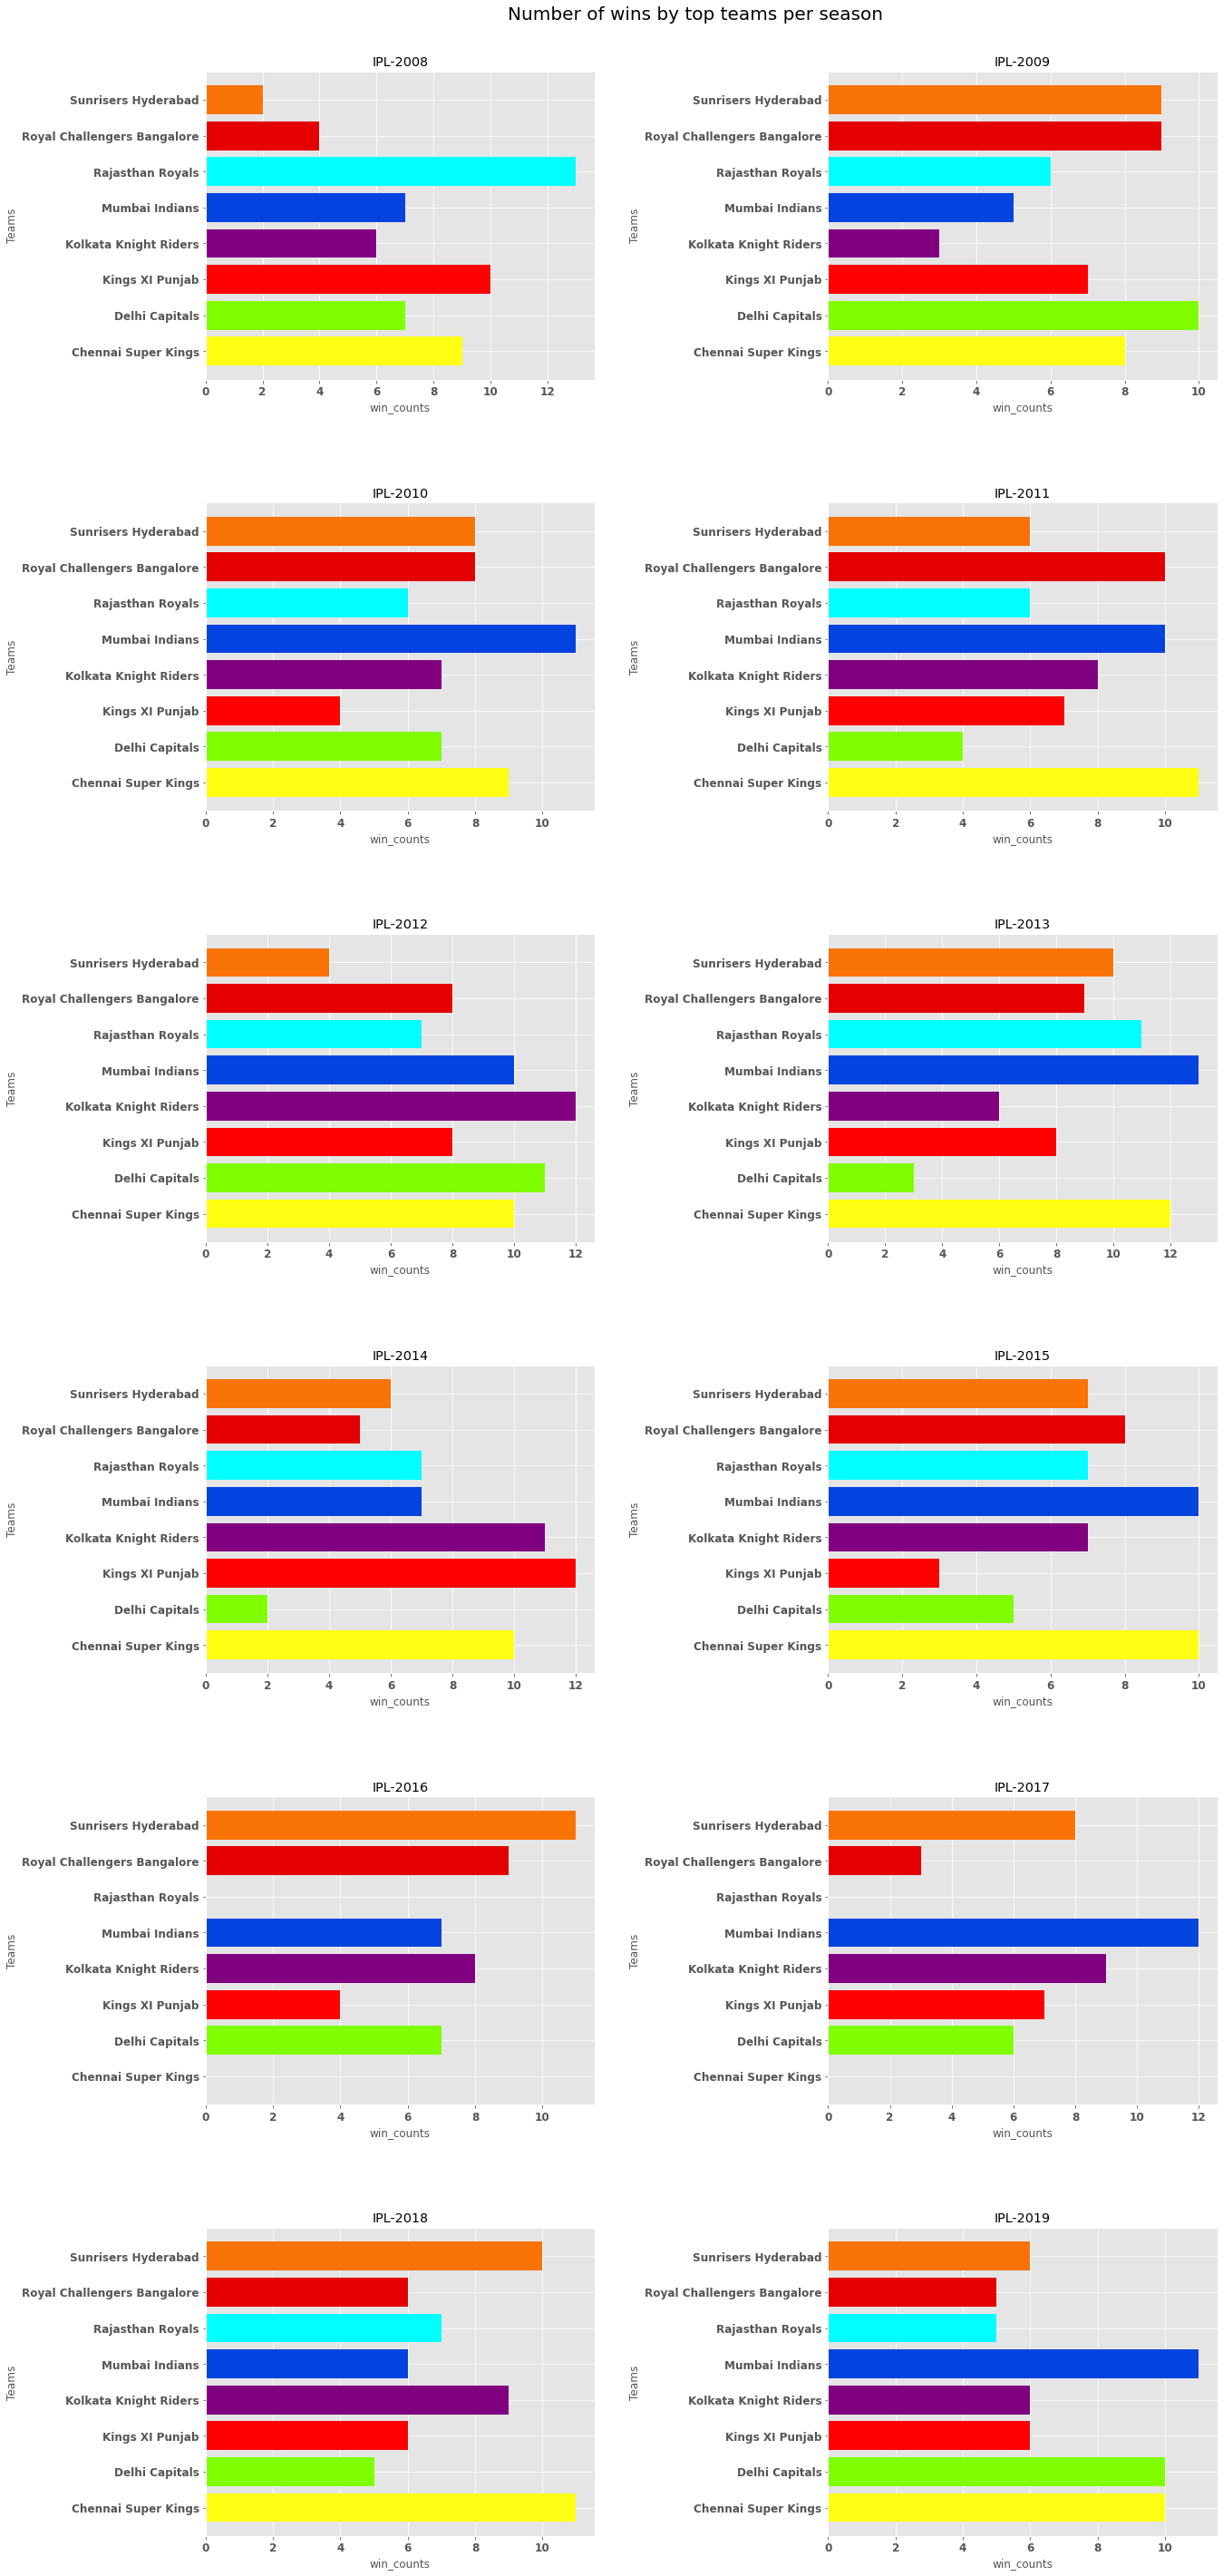

In [26]:
plt.style.use("ggplot")
plt.figure(figsize=(20,50))
k = 2008
for i,j in enumerate(DL):
    plt.subplot(6,2,i+1)
    plt.barh(j.winner,j.win_count,color=["#FFFF14","#7FFF00","#FF0000","#800080","#0343DF","#00FFFF","#E50000","#F97306"])
    plt.title(f"IPL-{k}")
    plt.xlabel("win_counts")
    plt.ylabel("Teams")
    plt.yticks(weight="bold",fontsize=12)
    plt.xticks(weight="bold",fontsize=12)
    k+=1
   
plt.subplots_adjust(hspace=0.4,wspace=0.6)
plt.suptitle("Number of wins by top teams per season",fontsize=20,y=0.9)
plt.show()

#### Cities in which Teams won maximum matches

In [27]:
city_won = df_matches[["city","winner"]].copy()
city_won

,city,winner
0,Hyderabad,Sunrisers Hyderabad
1,Pune,Rising Pune Supergiant
2,Rajkot,Kolkata Knight Riders
3,Indore,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore
...,...,...
747,Mumbai,Mumbai Indians
748,Chennai,Mumbai Indians
749,Visakhapatnam,Delhi Capitals
750,Visakhapatnam,Chennai Super Kings


In [28]:
city_won = pd.crosstab(city_won.city,city_won.winner).stack().reset_index()
city_won.rename(columns={0:"win_count"},inplace = True)
city_won = city_won[city_won["winner"].isin(Top_teams)].sort_values("win_count",ascending=False)

In [29]:
# selecting only top 8 teams
city_won = city_won.head(8)
city_won

,city,winner,win_count
270,Mumbai,Mumbai Indians,53
247,Kolkata,Kolkata Knight Riders,45
99,Chennai,Chennai Super Kings,40
175,Hyderabad,Sunrisers Hyderabad,33
194,Jaipur,Rajasthan Royals,32
122,Delhi,Delhi Capitals,31
42,Bangalore,Royal Challengers Bangalore,30
91,Chandigarh,Kings XI Punjab,22


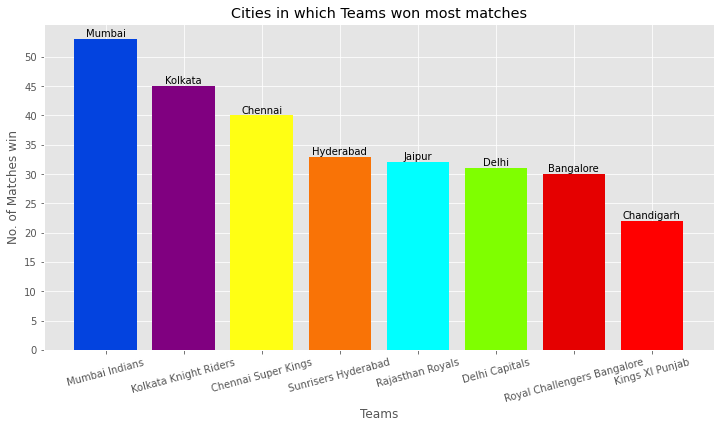

In [30]:
l = list(city_won.city)
j=0
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
rec = plt.bar(city_won.winner,city_won.win_count,color=["#0343DF","#800080","#FFFF14","#F97306","#00FFFF","#7FFF00","#E50000","#FF0000"])
for i in rec:
    h = i.get_height();
    plt.text(i.get_x()+i.get_width()/2.,h+.4,l[j],ha="center")
    j+=1
plt.yticks(np.arange(0,55,5))
plt.title("Cities in which Teams won most matches")
plt.xlabel("Teams")
plt.ylabel("No. of Matches win")
plt.xticks(rotation=15)
plt.show()

Here we can easily say that teams are won maximum matches in their homeground.

#### Results while bowling first

In [31]:
bowling_first_win = df_matches[(df_matches.win_by_runs==0) & (df_matches.win_by_wickets>=1)]

In [79]:
#team win by maximum wickets in IPL
win_by_max_wickets = bowling_first_win[bowling_first_win.win_by_wickets==bowling_first_win.win_by_wickets.max()]
win_by_max_wickets

,index,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
2,2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
34,34,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ..."
71,71,2008,Mumbai,2008-04-27,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,10,AC Gilchrist,Dr DY Patil Sports Academy
119,119,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,10,DL Vettori,Newlands
183,183,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium
298,298,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium
375,376,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium
389,390,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
541,542,2015,Delhi,2015-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla
587,590,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium


In [80]:
win_by_max_wickets.winner.value_counts()

Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Kings XI Punjab                1
Delhi Capitals                 1
Kolkata Knight Riders          1
Chennai Super Kings            1
Rajasthan Royals               1
Mumbai Indians                 1
Name: winner, dtype: int64

- Royal Challengers Bangalore wins 3 times by 10 wickets(without loosing any wicket) in IPL

In [33]:
matches = bowling_first_win.win_by_wickets.value_counts()
wickets = bowling_first_win.win_by_wickets.value_counts().index

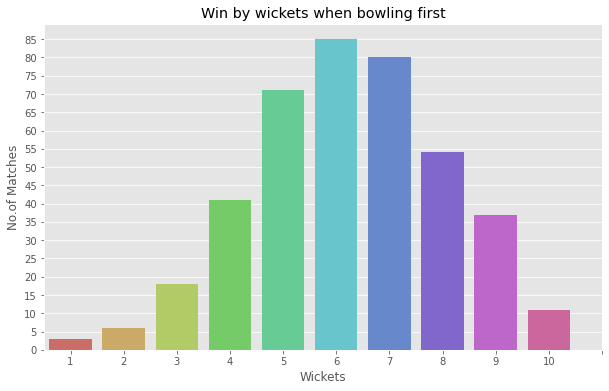

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=wickets,y=matches,palette="hls")
plt.title("Win by wickets when bowling first")
plt.xlabel("Wickets")
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,90,5))
plt.ylabel("No.of Matches")
plt.show()

- maximum number of matches win by 6 wickets

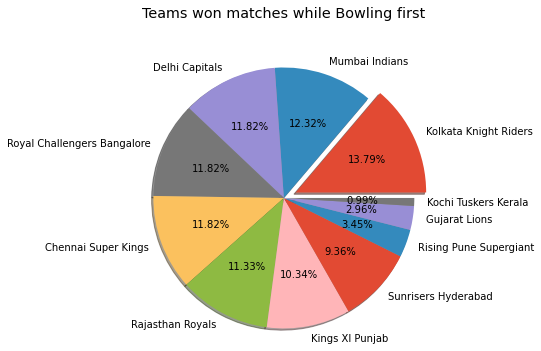

In [77]:
plt.pie(bowling_first_win.winner.value_counts(),labels=bowling_first_win.winner.value_counts().keys(),radius = 1.5,autopct="%.2f%%",shadow=True,wedgeprops={'linewidth':1},explode=[0.15 if i==0 else 0 for i in range(11)])
plt.title("Teams won matches while Bowling first",y=1.3)
plt.show()

- Kolkata Knight Riders wins maximum matches while bowling first

#### Results while Bating first

In [36]:
bating_first_win = df_matches[(df_matches.win_by_wickets == 0) & (df_matches.win_by_runs>0)]

In [72]:
#team win by maximum runs in IPL
bating_first_win[bating_first_win.win_by_runs==bating_first_win.win_by_runs.max()]

,index,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
43,43,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla


- Mumbai Indians win by maximum(146) runs in IPL against Delhi Capital 

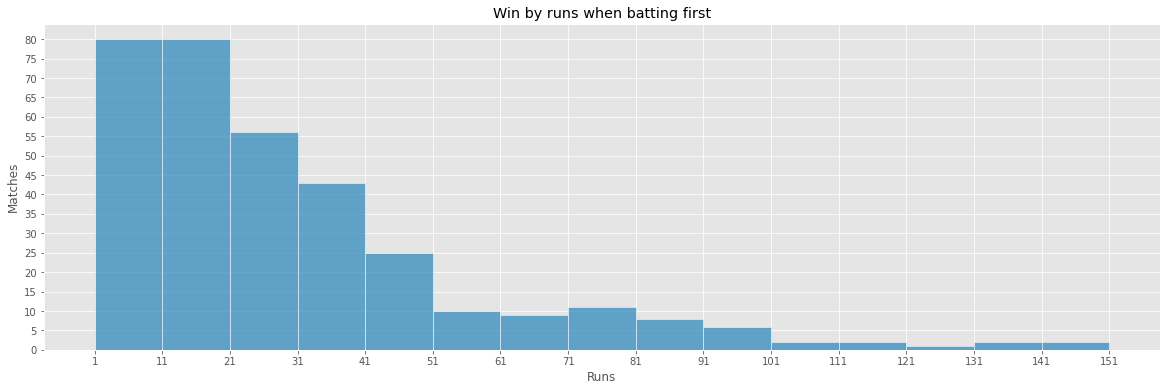

In [38]:
plt.figure(figsize=(20,6))
sns.histplot(bating_first_win.win_by_runs,bins=15,edgecolor="white",palette="hls",binwidth=10)
plt.title("Win by runs when batting first")
plt.xlabel("Runs")
plt.xticks(np.arange(1,160,10))
plt.yticks(np.arange(0,85,5))
plt.ylabel("Matches")
plt.show()

- maximum matches win by 10-20 runs

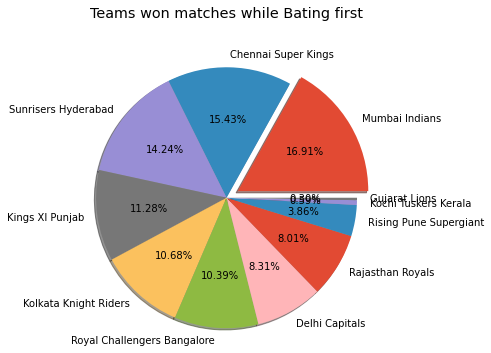

In [81]:
plt.pie(bating_first_win.winner.value_counts(),labels=bating_first_win.winner.value_counts().keys(),radius = 1.5,autopct="%.2f%%",shadow=True,wedgeprops={'linewidth':1},explode=[0.15 if i==0 else 0 for i in range(11)])
plt.title("Teams won matches while Bating first",y=1.3)
plt.show()

- Mumbai Indians win maximum matches while batting first

In [40]:
# Frequency of match result
df_matches.result.value_counts()

normal    743
tie         9
Name: result, dtype: int64

#### toss wins w.r.t each team

In [87]:
toss_wins = df_matches.toss_winner.value_counts()

In [88]:
total_match = df_matches.team1.value_counts() + df_matches.team2.value_counts()

In [92]:
pd.concat([toss_wins,total_match],axis=1).rename(columns={"toss_winner":"toss_wins",0:"total_match"})

,toss_wins,total_match
Mumbai Indians,98,187
Kolkata Knight Riders,92,178
Chennai Super Kings,89,164
Delhi Capitals,89,175
Sunrisers Hyderabad,89,183
Kings XI Punjab,81,176
Royal Challengers Bangalore,80,177
Rajasthan Royals,78,145
Rising Pune Supergiant,33,75
Gujarat Lions,15,30


#### Most successfull teams in IPL

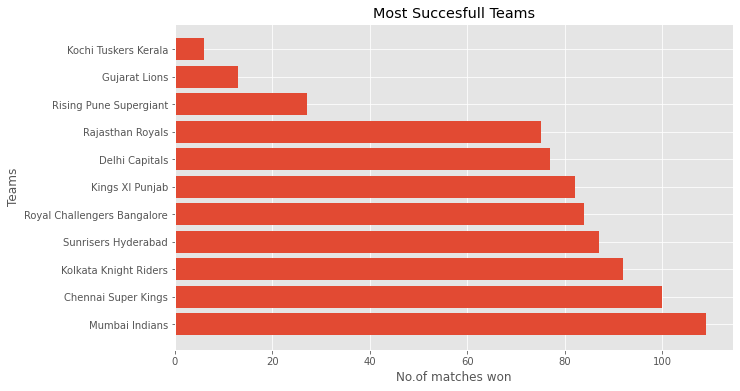

In [42]:
plt.figure(figsize=(10,6))
plt.barh(df_matches.winner.value_counts().keys(),df_matches.winner.value_counts())
plt.ylabel("Teams")
plt.xlabel("No.of matches won")
plt.title("Most Succesfull Teams")
plt.show()

#### Top 10 man of the match players in IPL

In [43]:
df_matches.player_of_match.value_counts()[:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

In [44]:
mom_name = list(df_matches.player_of_match.value_counts()[:10].keys())
mom_count = list(df_matches.player_of_match.value_counts()[:10].values)

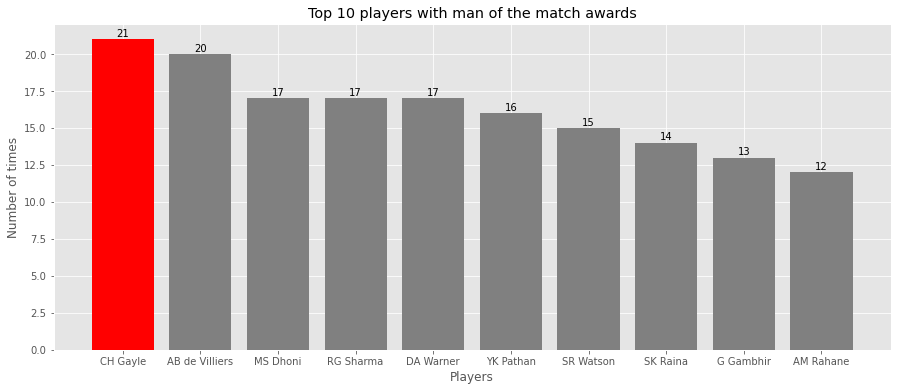

In [45]:
plt.figure(figsize=(15,6))
cls = ["grey" if (x<max(mom_count)) else "red" for x in mom_count]
bar  = plt.bar(mom_name,mom_count,color=cls)
plt.xlabel("Players")
plt.ylabel("Number of times")
plt.title("Top 10 players with man of the match awards")

for i in bar:
    h = i.get_height()
    plt.text(i.get_x()+i.get_width()/2.,h+.2,h,ha="center")
plt.show()

#### toss win match win percent

In [46]:
twmw = np.sum(df_matches.toss_winner==df_matches.winner)

In [47]:
(twmw/812)*100    

48.399014778325125

- So we cannot say that a team who wins the toss may wins the match also.

#### which Toss decision is taking most, Bat or Field

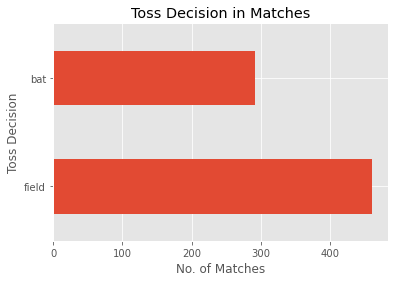

In [48]:
df_matches.toss_decision.value_counts().plot(kind="barh")
plt.ylabel("Toss Decision")
plt.xlabel("No. of Matches")
plt.title("Toss Decision in Matches");

#### Toss win Match win , Which team did better

In [49]:
teams = df_matches[df_matches.toss_winner==df_matches.winner]["winner"].value_counts()

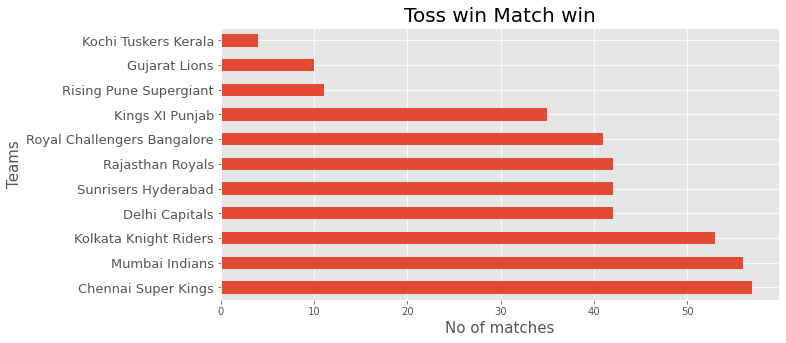

In [50]:
plt.figure(figsize=(10,5))
teams.plot(kind="barh")
plt.yticks(fontsize=13)
plt.title("Toss win Match win",fontsize=20)
plt.xlabel("No of matches",fontsize=15)
plt.ylabel("Teams",fontsize=15)
plt.show()

In [51]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [52]:
match1 = df_deliveries[df_deliveries.match_id==1]
match1.shape

(248, 18)

In [53]:
match1.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

In [54]:
srh = match1[match1.inning == 1]
srh.batsman_runs.value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [55]:
rcb=match1[match1.inning ==2]
rcb.batsman_runs.value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

So in the first match 
- rcb hitted 8 six and srh hitted 9 six. 
- rcb hitted 15 fours and srh hitted 17 fours.
- there was 32 dotballs in first inning and 49 dotballs in second inning 
- so we can say that srh was winner

#### Top sixer kings in IPL

In [56]:
df_deliveries[df_deliveries.batsman_runs==6]["batsman"].value_counts()[:10]

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman, dtype: int64

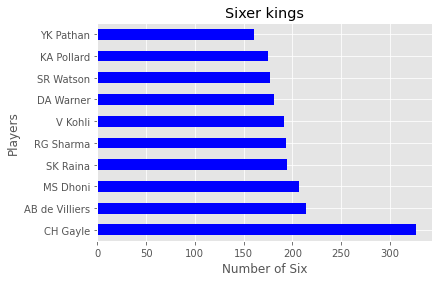

In [57]:
df_deliveries[df_deliveries.batsman_runs==6]["batsman"].value_counts()[:10].plot(kind="barh",color="blue")
plt.ylabel("Players")
plt.xlabel("Number of Six")
plt.title("Sixer kings")
plt.show()

- CH Gayle hitted maximum number of sixes in IPL

####  top 5 preferable bowlerers in superover 

In [58]:
df_deliveries[df_deliveries.is_super_over==1]["bowler"].value_counts()[:5]

JP Faulkner      11
JJ Bumrah         8
Kamran Khan       7
R Vinay Kumar     7
CH Morris         7
Name: bowler, dtype: int64

#### Which Season had most number of matches?

In [60]:
df_matches.season.value_counts().index[0]

2013

#### which player have maximum runs in IPL?

In [61]:
max_run = df_deliveries[["batsman","batsman_runs"]]
max_run = max_run.groupby("batsman").sum()

In [62]:
max_run.nlargest(1,"batsman_runs")

,batsman_runs
batsman,
V Kohli,5434


- Virat Kohli have maximum runs in IPL

#### which players have maximum runs in an inning?

In [111]:
max_run_inning = df_deliveries[["match_id","batsman","batsman_runs"]]

In [112]:
max_run_in = max_run_inning.groupby(["batsman","match_id"]).sum()
max_run_in

batsman_runs
batsman        match_id              
A Ashish Reddy 346                 10
               352                  3
               359                  8
               373                 10
               376                  4
...                               ...
Z Khan         462                  0
               470                  7
               477                  1
               578                  4
               623                  2

[11294 rows x 1 columns]

In [113]:
max_run_in.nlargest(5,"batsman_runs")

,,batsman_runs
batsman,match_id,
CH Gayle,411,175
BB McCullum,60,158
AB de Villiers,562,133
RR Pant,7935,130
AB de Villiers,620,129


In [115]:
df_deliveries[(df_deliveries.match_id == 411) & (df_deliveries.batsman == "CH Gayle")].batsman_runs.value_counts()

1    21
0    18
6    17
4    13
Name: batsman_runs, dtype: int64

- CH Gayle have maximum(175) runs in an inning with 17 sixes and 13 fours.

#### Bowlers with most wide balls and no balls

In [63]:
wn = df_deliveries[["bowler","wide_runs","noball_runs"]]
wn = wn.groupby("bowler").sum()

In [64]:
wide = wn.wide_runs.nlargest(5)
noball = wn.noball_runs.nlargest(5)

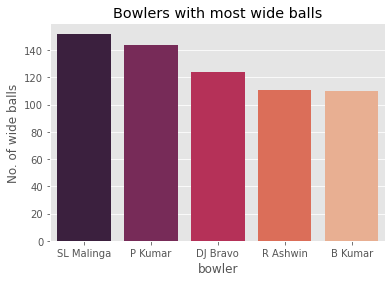

In [65]:
sns.barplot(x=wide.index,y=wide,palette="rocket")
plt.ylabel("No. of wide balls")
plt.title("Bowlers with most wide balls")
plt.show()

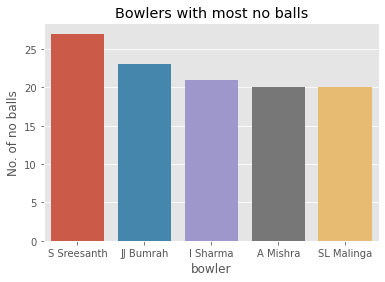

In [66]:
sns.barplot(x=noball.index,y=noball)
plt.ylabel("No. of no balls")
plt.title("Bowlers with most no balls")
plt.show()